# Analyze target statistics

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.dpi"] = 150
sns.set(style='darkgrid')
from IPython.display import display
import warnings
warnings.simplefilter('ignore', UserWarning)
from pathlib import Path
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams["font.size"] = 15
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Read target csv
subset_name = 'target_subset_' + Path('.').resolve().name
df = pd.read_csv(f'../../../../data/interim/{subset_name}.csv', index_col=0)
df

,id,resolution,releasedate,header,sequence,length,num_entry_in_cluster,num_entry_in_cluster_AF2_notInclude,is_similar_AF2
0,5WM2_A,1.548,2018-05-23T00:00:00Z,>5wm2_A mol:protein length:564 Salicylate-AMP...,MGSSHHHHHHSSGLVPRGSHMLDGWVPWPESFARRYRAAGYWEGRP...,564,24,10,True
1,6R9H_A,2.000,2021-02-03T00:00:00Z,>6r9h_A mol:protein length:166 Syntenin-1,GAMDPREVILCKDQDGKIGLRLKSIDNGIFVQLVQANSPASLVGLR...,166,28,8,True
2,6W1T_D,2.010,2020-05-13T00:00:00Z,>6w1t_D mol:protein length:352 Photosystem II...,MTIAIGRAPAERGWFDILDDWLKRDRFVFVGWSGILLFPCAYLALG...,352,164,79,True
3,6XIP_B,1.500,2020-07-01T00:00:00Z,>6xip_B mol:protein length:122 Non-structural...,EDKRAKVTSAMQTMLFTMLRKLDNDALNNIINNARDGCVPLNIIPL...,122,15,14,True
4,6D0C_B,1.500,2018-10-31T00:00:00Z,>6d0c_B mol:protein length:121 Aryl hydrocarb...,GEFKGLNVCQPTRFISRHNIEGIFTFVDHRCVATVGYQPQELLGKN...,121,33,9,True
...,...,...,...,...,...,...,...,...,...
295,5ZY6_A,2.099,2019-05-22T00:00:00Z,>5zy6_A mol:protein length:274 Probable catec...,HHHHHHHHMPHMEDNGSEKEQLFLQHIQNLPQERLDAIRGHPELVL...,274,4,4,False
296,6HNI_A,1.350,2019-08-28T00:00:00Z,>6hni_A mol:protein length:319 ABC-type trans...,SMASQGGDSGNSKQESNSKDKEVKKIGITQLVEHPALDATRTGFVK...,319,3,3,False
297,6IG4_A,2.261,2019-07-10T00:00:00Z,>6ig4_A mol:protein length:313 Phosphatidate ...,MGSSHHHHHHSSGLVPRGSHMSHHAKCTVAQLLKQNLLTFENQRIQ...,313,6,6,False
298,6GPA_A,1.790,2018-12-26T00:00:00Z,>6gpa_A mol:protein length:314 Arabinogalacta...,VVKEEGFARGADVSWLTQMEAEGLKFYTPDENRQEMECMDLLRDYC...,314,2,2,False


In [3]:
df['is_similar_AF2'] = ['True' if x == True else 'False' for x in df['is_similar_AF2']]

In [4]:
# Number of sequences included in the AF2 training data in the cluster
df['num_sequence_in_cluster_included_AF2'] = df['num_entry_in_cluster'] - df['num_entry_in_cluster_AF2_notInclude']

## Show target distribution

<AxesSubplot:xlabel='length'>

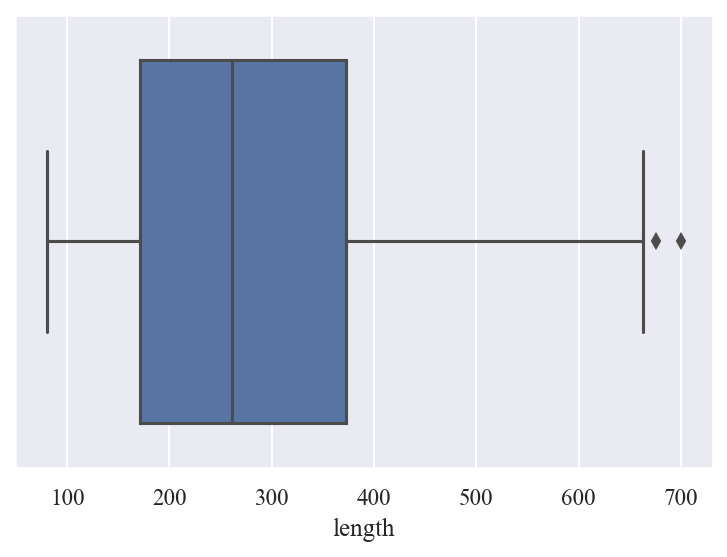

In [5]:
# Sequence length
sns.boxplot(data=df, x='length')

<AxesSubplot:xlabel='length', ylabel='is_similar_AF2'>

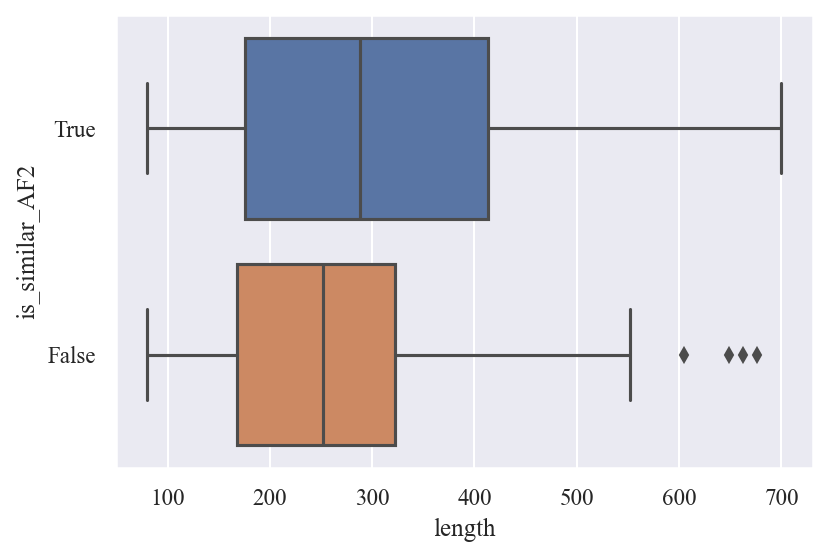

In [6]:
sns.boxplot(data=df, x='length', y='is_similar_AF2')

<AxesSubplot:xlabel='resolution'>

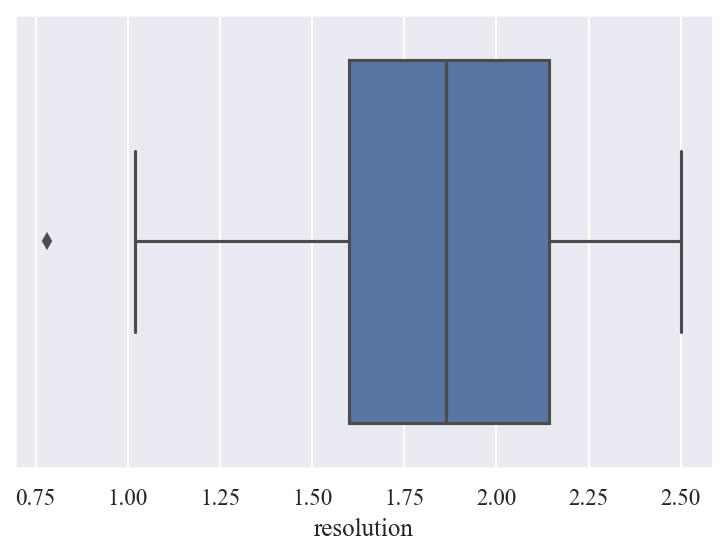

In [7]:
# Resolution
sns.boxplot(data=df, x='resolution')

<AxesSubplot:xlabel='resolution', ylabel='is_similar_AF2'>

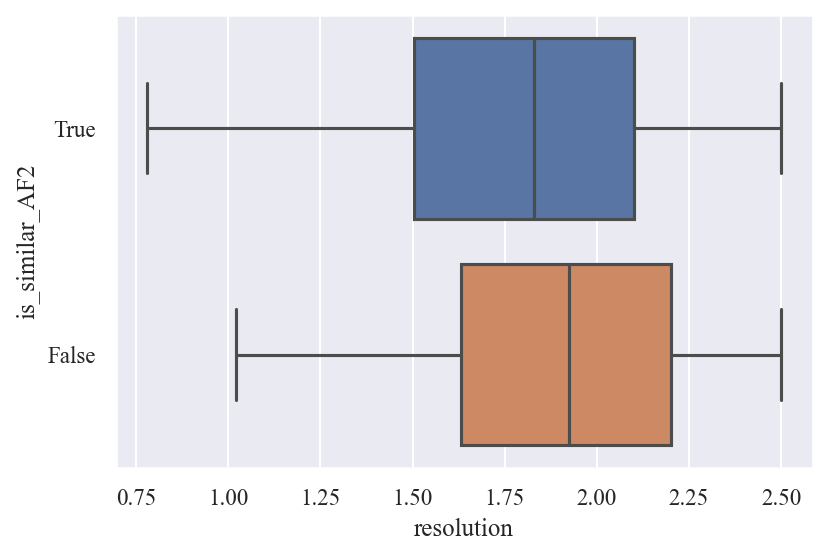

In [8]:
sns.boxplot(data=df, x='resolution', y='is_similar_AF2')

<AxesSubplot:xlabel='is_similar_AF2', ylabel='count'>

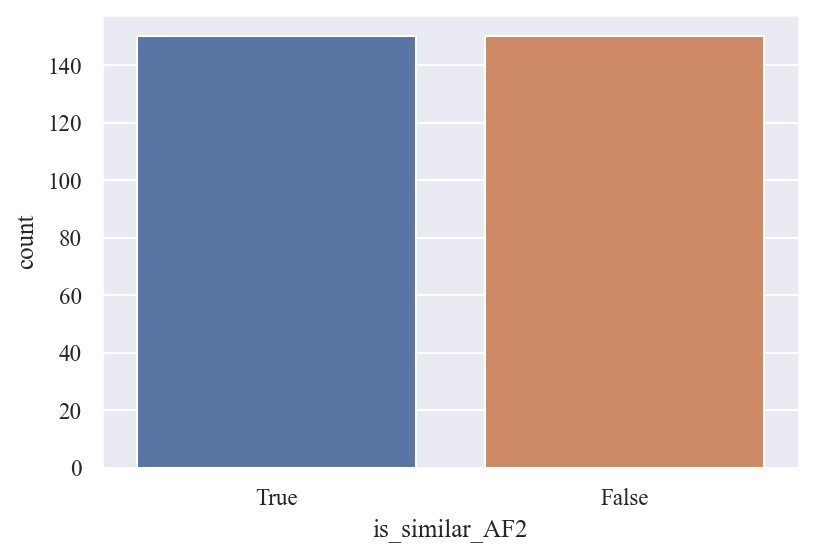

In [9]:
# Target number that have similar sequence to AF2 training dataset and not
sns.countplot(data=df, x='is_similar_AF2')

/Users/TAKEI/miniforge3/envs/mypython/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_entry_in_cluster'>

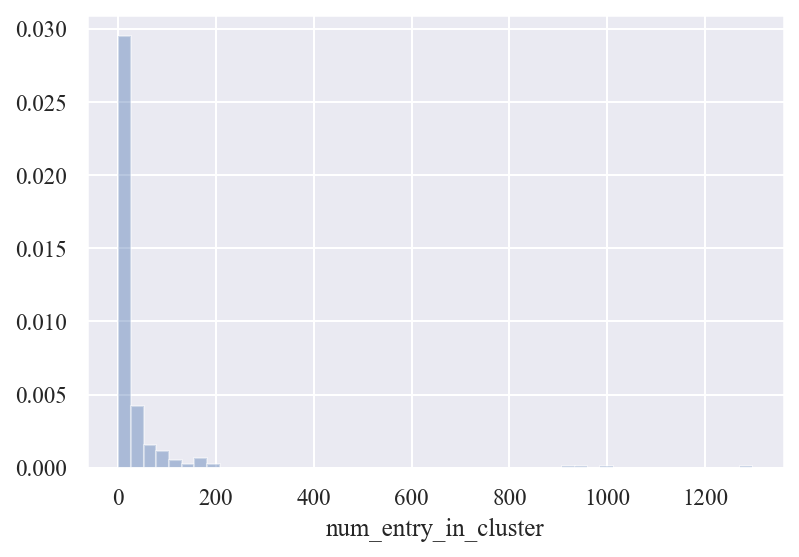

In [10]:
sns.distplot(df['num_entry_in_cluster'], kde=False, norm_hist=True)

<AxesSubplot:xlabel='num_sequence_in_cluster_included_AF2'>

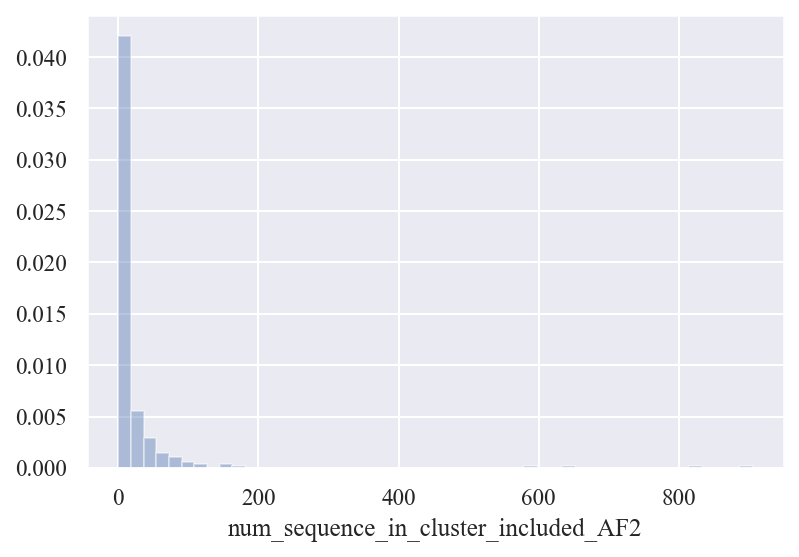

In [11]:
sns.distplot(df['num_sequence_in_cluster_included_AF2'], kde=False, norm_hist=True)